In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import cv2
import pandas as pd
import idx2numpy
import os
from sklearn.neighbors import NearestNeighbors

In [2]:
x_tr=idx2numpy.convert_from_file("train-images-idx3-ubyte")
x_te=idx2numpy.convert_from_file("t10k-images-idx3-ubyte")
y_tr=idx2numpy.convert_from_file("train-labels-idx1-ubyte")
y_te=idx2numpy.convert_from_file("t10k-labels-idx1-ubyte")

In [3]:
X = np.concatenate((x_tr, x_te), axis=0)
y = np.concatenate((y_tr, y_te), axis=0)

In [4]:
X = X.reshape(70000, 784)

In [5]:
X.shape

(70000, 784)

In [6]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [4]:
# img_re=[]
# for i in range(0,len(x_tr)):    
#     res = cv2.resize(x_tr[i], dsize=(21, 21), interpolation=cv2.INTER_CUBIC)
#     img_re.append(res)
# img_re=np.array(img_re)
# img_re=img_re.reshape(60000,441)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

In [33]:
X_train.shape

(49000, 200)

In [197]:
sample = X_train[:7000]

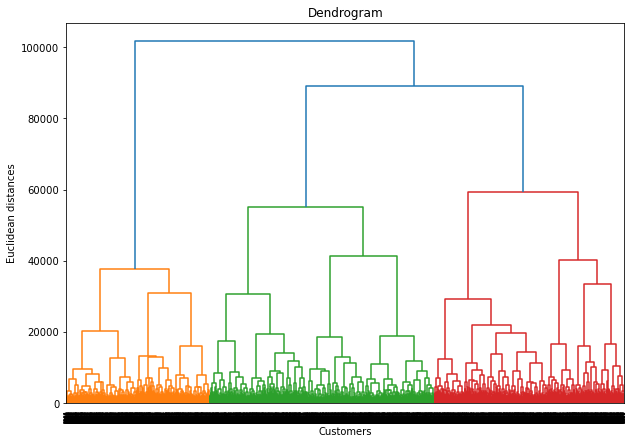

In [198]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))


dendrogram = sch.dendrogram(sch.linkage(sample, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [8]:
pca_b = PCA(200)
X_train=pca_b.fit_transform(X_train)
sum(pca_b.explained_variance_ratio_)


0.9317193880540571

In [191]:
print(X_train)

array([[ -123.99379079,  1633.07439599, -1211.04119121, ...,
           -3.00117371,    22.39695535,    71.87333023],
       [ 1407.92885252,  -451.64133562,  -261.02703418, ...,
           -6.72448669,   -14.50048513,    34.26646837],
       [ -725.91079524, -1101.83813753,   106.15424242, ...,
           -5.6567404 ,    -9.02797635,    -2.25798714],
       ...,
       [  857.75019572, -1180.24018348,  -520.69399443, ...,
            5.488076  ,   -52.11287433,     5.41996141],
       [ -807.4765258 ,  -581.21887274,   480.31990864, ...,
          -45.37954743,   -48.99452369,     2.00666528],
       [-1815.6638093 ,  -119.74334256,   468.91379755, ...,
           17.92535715,   -59.92595297,     2.43314439]])

In [16]:
X_train.shape

(49000, 200)

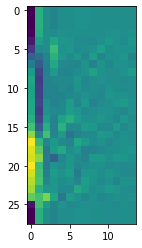

In [141]:
# plt.imshow(x_tr1)

In [193]:
n_samples = 7000
x_tr2 = x_tr[:7000]

In [194]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering()
AC_train = AC.fit(x_tr2)
#hirerical clustering

In [196]:
print("train set silhouette metrics:",silhouette_score(X=x_tr2,labels=AC_train.labels_))
# The Silhouette Coefficient is calculated using the mean intra-cluster
# distance (``a``) and the mean nearest-cluster distance (``b``) for each
# sample.

train set silhouette metrics: 0.16093208541485474


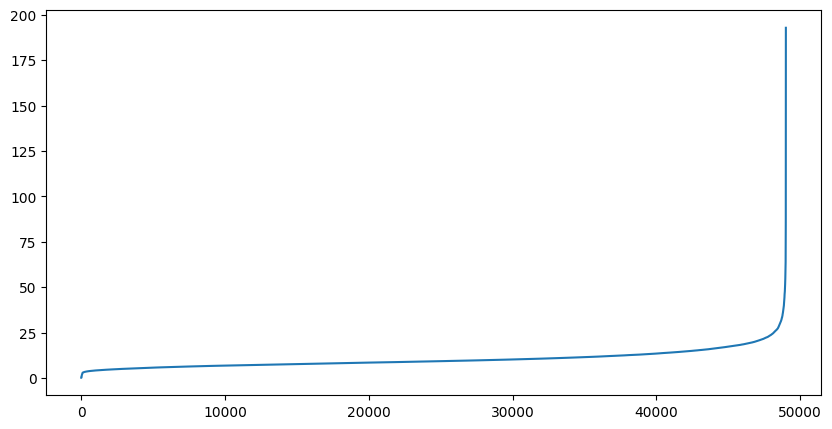

In [16]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(X_train)
distances, idx = nn.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [23]:
cluster = DBSCAN(eps=22.9, min_samples=3).fit(X_train)


In [27]:
cluster1 = DBSCAN(eps=22.9, min_samples=3).fit(X_test)

In [25]:
print("train set silhouette metrics:",silhouette_score(X=X_train,labels=cluster.labels_))

train set silhouette metrics: 0.17719150379791823


In [1]:
print("test set silhouette metrics:",silhouette_score(X=X_test,labels=cluster1.labels_))

test set silhouette metrics: 0.05799873675174936


In [32]:
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True
labels = cluster.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#print(list(cluster.labels_))
print(n_noise_,n_clusters_)

1299 10


In [31]:
core_samples_mask = np.zeros_like(cluster1.labels_, dtype=bool)
core_samples_mask[cluster1.core_sample_indices_] = True
labels = cluster1.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#print(list(cluster.labels_))
print(n_noise_,n_clusters_)

1107 10


In [26]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}